In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels as sms
import statsmodels.formula.api as smf
from scipy import stats

In [12]:
import pickle

In [4]:
DATA_FOLDER = '/Users/mengqi/Documents/Dacheng Xiu/mispricing/code/'
data = pd.read_csv(f'{DATA_FOLDER}/lagged_comp-fundr-ibes_for_val_1976-2019.csv', index_col = 0)

In [6]:
data = data.replace([np.inf, -np.inf], np.nan)
# train val split: 1979-2009 train, 2010-2019 test
tr = data.loc[(1979 <= data['year']) & (data['year'] <= 2009)]
ts = data.loc[(2010 <= data['year']) & (data['year'] <= 2019)]

tr3 = tr.dropna(subset = ['ni_3'])
ts3 = ts.dropna(subset = ['ni_3'])

X_tr3 = tr3.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts3 = ts3.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr3 = tr3['ni_3']
y_ts3 = ts3['ni_3']

X_tr3 = X_tr3.fillna(0).astype(float)
X_ts3 = X_ts3.fillna(0).astype(float)

y_tr3 = y_tr3.astype(float)
y_ts3 = y_ts3.astype(float)

print(X_tr3.shape, X_ts3.shape, y_tr3.shape, y_ts3.shape)

(144921, 301) (32589, 301) (144921,) (32589,)


In [8]:
from datetime import datetime
for i in [3, 4, 5]:
    rf = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=i, n_jobs=-1)
    rf.fit(X_tr3, y_tr3)
    yhat_tr3 = rf.predict(X_tr3)
    yhat_ts3 = rf.predict(X_ts3)
    inr2 = r2_score(y_tr3, yhat_tr3)
    outr2 = r2_score(y_ts3, yhat_ts3)
    print(datetime.now(), i, inr2, outr2)

2020-10-20 15:09:00.155275 3 0.4969640622006727 0.3953693969096722
2020-10-20 15:10:23.140424 4 0.5722788045374391 0.3347985069914048
2020-10-20 15:12:01.460316 5 0.6409754804034818 0.2898453913794641


In [10]:
for i in [2, 3]:
    for j in [50, 100, 150, 200]:
        rf = RandomForestRegressor(random_state=0, n_estimators=j, max_depth=i, n_jobs=-1)
        rf.fit(X_tr3, y_tr3)
        yhat_tr3 = rf.predict(X_tr3)
        yhat_ts3 = rf.predict(X_ts3)
        inr2 = r2_score(y_tr3, yhat_tr3)
        outr2 = r2_score(y_ts3, yhat_ts3)
        print(datetime.now(), i, j, inr2, outr2)

2020-10-20 15:14:53.270874 2 50 0.401960772128818 0.4065921345465957
2020-10-20 15:15:28.148631 2 100 0.4034196658666004 0.4006412809800307
2020-10-20 15:16:18.442883 2 150 0.4072614345877126 0.39242565565808973
2020-10-20 15:17:27.243931 2 200 0.40684096180678864 0.3975511849522305
2020-10-20 15:18:00.770976 3 50 0.49229499840056967 0.3707810046748016
2020-10-20 15:19:01.195525 3 100 0.4969640622006727 0.3953693969096722
2020-10-20 15:20:29.750710 3 150 0.49959159918157026 0.3878734350388997
2020-10-20 15:22:30.284133 3 200 0.5018411887665033 0.39481612824241097


In [13]:
rf3 = RandomForestRegressor(random_state=0, n_estimators=50, max_depth=2, n_jobs=-1)
rf3.fit(X_tr3, y_tr3)
with open('RF_regr3_tree50_depth2.pickle','wb') as handle:
          pickle.dump(rf3, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
yhat_tr3 = rf3.predict(X_tr3)
yhat_ts3 = rf3.predict(X_ts3)

<AxesSubplot:>

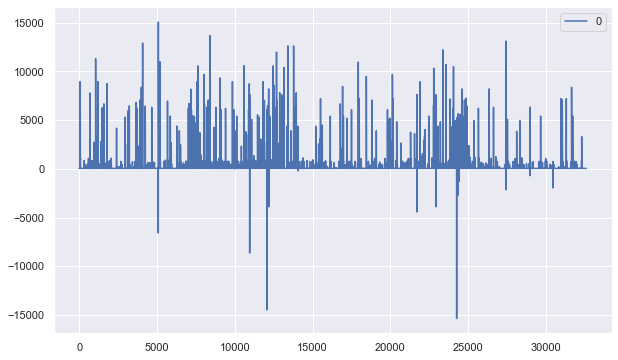

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
pd.DataFrame(yhat_ts3).plot()

<AxesSubplot:>

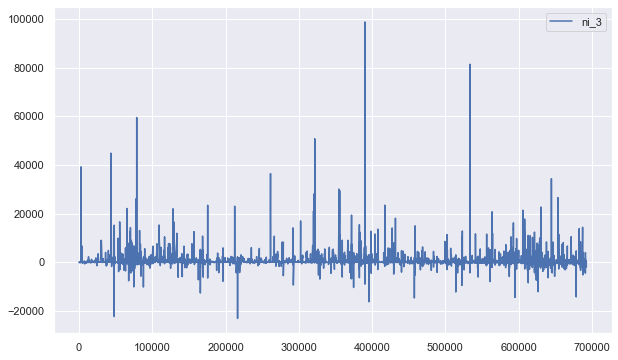

In [17]:
pd.DataFrame(y_ts3).plot()

In [23]:
# def median_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.median(np.abs((y_true - y_pred) / y_true)) 

# def median_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.median((-(y_true - y_pred) / y_true)) 

# pls1_in_mdape = median_absolute_percentage_error(y_tr1, yhat_tr1[:])
# pls1_out_mdape = median_absolute_percentage_error(y_ts1, yhat_ts1[:])
# pls1_in_mdpe = median_percentage_error(y_tr1, yhat_tr1[:])
# pls1_out_mdpe = median_percentage_error(y_ts1, yhat_ts1[:])
# print(pls1_in_mdape, pls1_out_mdape, pls1_in_mdpe, pls1_out_mdpe)

3.0527723528203103 1.0372650452036316 -0.22707476837544832 -0.7855457466697813


/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


['ib' 'pi' 'niadj' 'ebit' 'ebit_-5' 'dltt' 'pe_inc' 'nopi_-2' 'ebitda_-5'
 'ebit_-4' 'dvt' 'PEG_ltgforward' 'revt' 'ebit_-3' 'pe_op_basic']


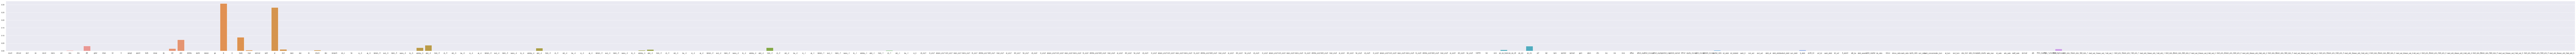

In [18]:
print(np.asarray(list(X_ts3.keys()))[(np.abs(rf3.feature_importances_[:]).argsort()[-15:][::-1])])
rf3.score(X_ts3, y_ts3)
sns.set(rc={'figure.figsize':(300,6)})
ax = sns.barplot(x=list(X_ts3.keys()), y=rf3.feature_importances_[:])

['ib' 'pi' 'niadj' 'ebit' 'ebit_-5' 'dltt' 'pe_inc' 'nopi_-2' 'ebitda_-5'
 'ebit_-4' 'dvt' 'PEG_ltgforward' 'revt' 'ebit_-3' 'pe_op_basic']


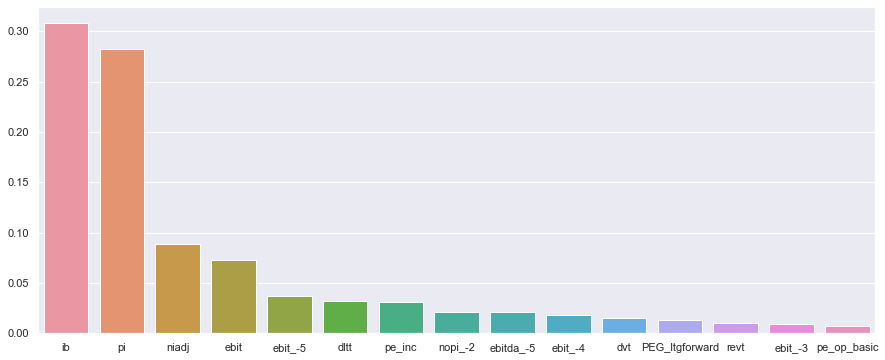

In [20]:
print(np.asarray(list(X_ts3.keys()))[(np.abs(rf3.feature_importances_[:]).argsort()[-15:][::-1])])
rf3.score(X_ts3, y_ts3)
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(X_ts3.keys()))[rf3.feature_importances_[:].argsort()[-15:][::-1]], 
                  y=(rf3.feature_importances_[:][rf3.feature_importances_[:].argsort()[-15:][::-1]]))

In [21]:
pct_er3 = (yhat_ts3- y_ts3)/y_ts3
pct_er3 = pct_er3.replace([np.inf, -np.inf], np.nan)
pct_er3 = pct_er3.dropna()
print(stats.ttest_1samp(pct_er3, 0))

Ttest_1sampResult(statistic=0.12617933984868976, pvalue=0.8995907434954395)


In [22]:
tr4 = tr.dropna(subset = ['ni_4'])
ts4 = ts.dropna(subset = ['ni_4'])

X_tr4 = tr4.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts4 = ts4.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr4 = tr4['ni_4']
y_ts4 = ts4['ni_4']

X_tr4 = X_tr4.fillna(0).astype(float)
X_ts4 = X_ts4.fillna(0).astype(float)

y_tr4 = y_tr4.astype(float)
y_ts4 = y_ts4.astype(float)

print(X_tr4.shape, X_ts4.shape, y_tr4.shape, y_ts4.shape)

(133344, 301) (26808, 301) (133344,) (26808,)


In [23]:
for i in [2, 3, 4]:
    for j in [50, 100, 150, 200]:
        rf = RandomForestRegressor(random_state=0, n_estimators=j, max_depth=i, n_jobs=-1)
        rf.fit(X_tr4, y_tr4)
        yhat_tr4 = rf.predict(X_tr4)
        yhat_ts4 = rf.predict(X_ts4)
        inr2 = r2_score(y_tr4, yhat_tr4)
        outr2 = r2_score(y_ts4, yhat_ts4)
        print(datetime.now(), i, j, inr2, outr2)

2020-10-20 15:41:14.773621 2 50 0.39389116565099613 0.23718393817336947
2020-10-20 15:41:52.018224 2 100 0.3959991135757439 0.290772577469667
2020-10-20 15:42:44.889811 2 150 0.3948428812431116 0.31617454225742514
2020-10-20 15:43:55.233429 2 200 0.3942876033538302 0.31511949918875504
2020-10-20 15:44:23.651966 3 50 0.4863242789738371 0.226964247787948
2020-10-20 15:45:17.003335 3 100 0.48492406110382313 0.27514071793147576
2020-10-20 15:46:38.405797 3 150 0.48445620429591696 0.2997580425707693
2020-10-20 15:48:29.647678 3 200 0.4848990372100924 0.2916897158031827
2020-10-20 15:49:09.469361 4 50 0.5477640759647531 0.22179643576507868
2020-10-20 15:50:23.706692 4 100 0.543251741661795 0.2561318971105425
2020-10-20 15:52:13.013442 4 150 0.5424375409949218 0.2879685718995797
2020-10-20 15:54:28.236005 4 200 0.5444303360542052 0.2845210181159078


In [24]:
rf4 = RandomForestRegressor(random_state=0, n_estimators=150, max_depth=2, n_jobs=-1)
rf4.fit(X_tr4, y_tr4)
with open('RF_regr4_tree150_depth2.pickle','wb') as handle:
          pickle.dump(rf4, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
yhat_tr4 = rf4.predict(X_tr4)
yhat_ts4 = rf4.predict(X_ts4)

<AxesSubplot:>

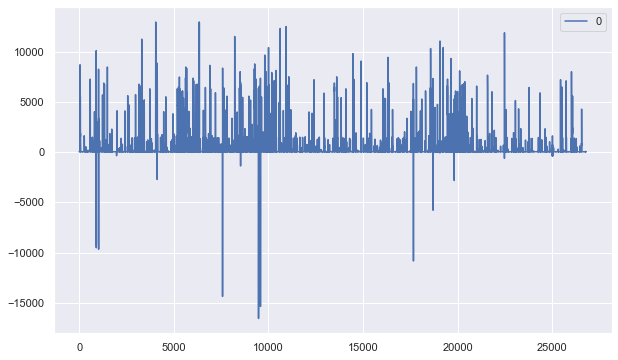

In [26]:
sns.set(rc={'figure.figsize':(10,6)})
pd.DataFrame(yhat_ts4).plot()

<AxesSubplot:>

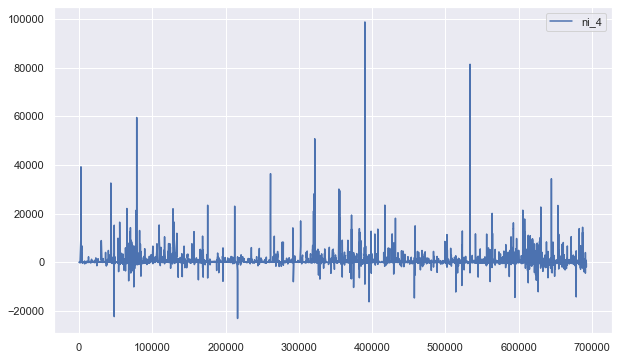

In [27]:
pd.DataFrame(y_ts4).plot()

['ib' 'ebit' 'pi' 'ebit_-3' 'ebit_-4' 'PEG_1yrforward' 'capital_ratio'
 'ebitda_-4' 'dvt' 'niadj' 'ebit_-1' 'nopi_-3' 'revt_-1' 'dltt' 'pi_-1']


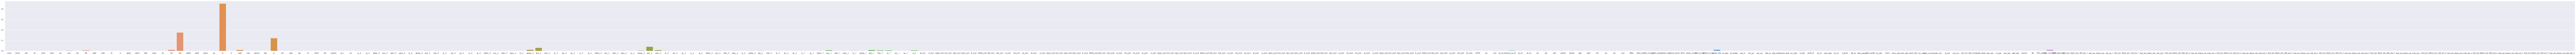

In [28]:
print(np.asarray(list(X_ts4.keys()))[(np.abs(rf4.feature_importances_[:]).argsort()[-15:][::-1])])
rf4.score(X_ts4, y_ts4)
sns.set(rc={'figure.figsize':(300,6)})
ax = sns.barplot(x=list(X_ts4.keys()), y=rf4.feature_importances_[:])

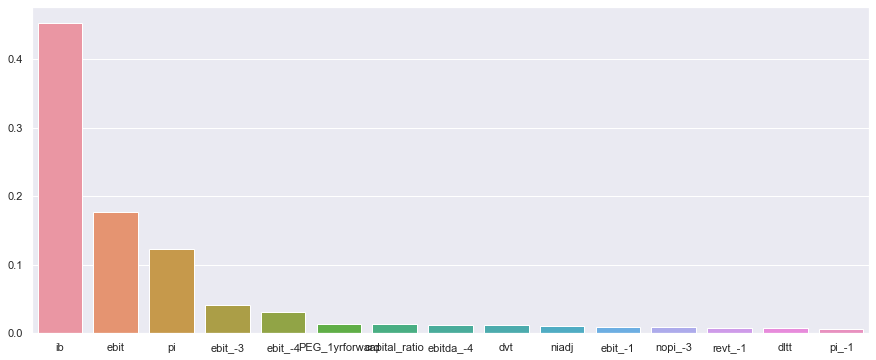

In [29]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(X_ts4.keys()))[rf4.feature_importances_[:].argsort()[-15:][::-1]], 
                  y=(rf4.feature_importances_[:][rf4.feature_importances_[:].argsort()[-15:][::-1]]))

In [30]:
pct_er4 = (yhat_ts4- y_ts4)/y_ts4
pct_er4 = pct_er4.replace([np.inf, -np.inf], np.nan)
pct_er4 = pct_er4.dropna()
print(stats.ttest_1samp(pct_er4, 0))

Ttest_1sampResult(statistic=0.28788773471665274, pvalue=0.7734349015517221)


In [31]:
tr5 = tr.dropna(subset = ['ni_5'])
ts5 = ts.dropna(subset = ['ni_5'])

X_tr5 = tr5.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts5 = ts5.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr5 = tr5['ni_5']
y_ts5 = ts5['ni_5']

X_tr5 = X_tr5.fillna(0).astype(float)
X_ts5 = X_ts5.fillna(0).astype(float)

y_tr5 = y_tr5.astype(float)
y_ts5 = y_ts5.astype(float)

print(X_tr5.shape, X_ts5.shape, y_tr5.shape, y_ts5.shape)

(123038, 301) (21586, 301) (123038,) (21586,)


In [32]:
for i in [2, 3, 4]:
    for j in [50, 100, 150, 200]:
        rf = RandomForestRegressor(random_state=0, n_estimators=j, max_depth=i, n_jobs=-1)
        rf.fit(X_tr5, y_tr5)
        yhat_tr5 = rf.predict(X_tr5)
        yhat_ts5 = rf.predict(X_ts5)
        inr2 = r2_score(y_tr5, yhat_tr5)
        outr2 = r2_score(y_ts5, yhat_ts5)
        print(datetime.now(), i, j, inr2, outr2)

2020-10-20 16:19:36.377133 2 50 0.39345984901600306 0.3703337370265035
2020-10-20 16:20:08.240319 2 100 0.3917246489055787 0.3676585718641555
2020-10-20 16:20:54.913409 2 150 0.39300534807846765 0.363199944450185
2020-10-20 16:21:58.048555 2 200 0.39422856393203987 0.36559120701119474
2020-10-20 16:22:23.907786 3 50 0.48370848945875866 0.38109964995151135
2020-10-20 16:23:11.018827 3 100 0.4831782272838998 0.3783205418585033
2020-10-20 16:24:21.775205 3 150 0.4832369093006299 0.3813949603489346
2020-10-20 16:26:00.866995 3 200 0.48363850129318275 0.37739244419608975
2020-10-20 16:26:35.395056 4 50 0.5453391314563301 0.34139740063248314
2020-10-20 16:27:41.561256 4 100 0.5466587473488542 0.3475282039339662
2020-10-20 16:29:14.958962 4 150 0.54781509581741 0.3470101495180994
2020-10-20 16:31:19.787039 4 200 0.5484783194947431 0.3409108561772557


In [33]:
rf5 = RandomForestRegressor(random_state=0, n_estimators=150, max_depth=3, n_jobs=-1)
rf5.fit(X_tr5, y_tr5)
with open('RF_regr5_tree150_depth3.pickle','wb') as handle:
          pickle.dump(rf5, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
yhat_tr5 = rf5.predict(X_tr5)
yhat_ts5 = rf5.predict(X_ts5)

<AxesSubplot:>

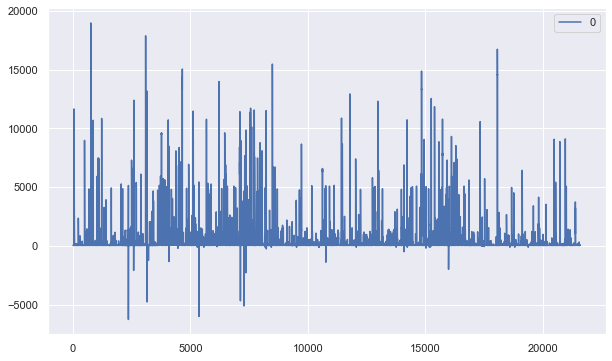

In [35]:
sns.set(rc={'figure.figsize':(10,6)})
pd.DataFrame(yhat_ts5).plot()

<AxesSubplot:>

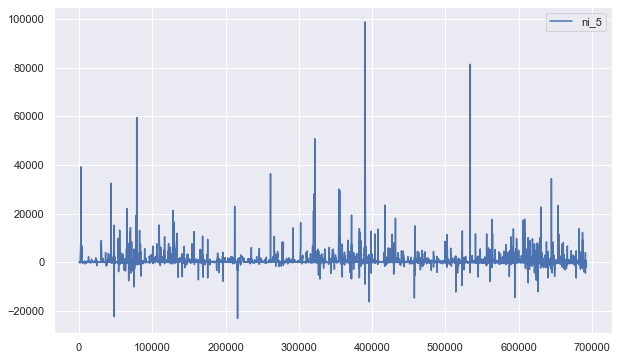

In [36]:
pd.DataFrame(y_ts5).plot()

['ebit' 'ib' 'dltt' 'pi' 'cash_conversion' 'ib_-1' 'PEG_1yrforward' 'ceq'
 'ebitda' 'pe_op_basic' 'revt' 'pi_-1' 'ib_-2' 'ni_-2' 'nopi']


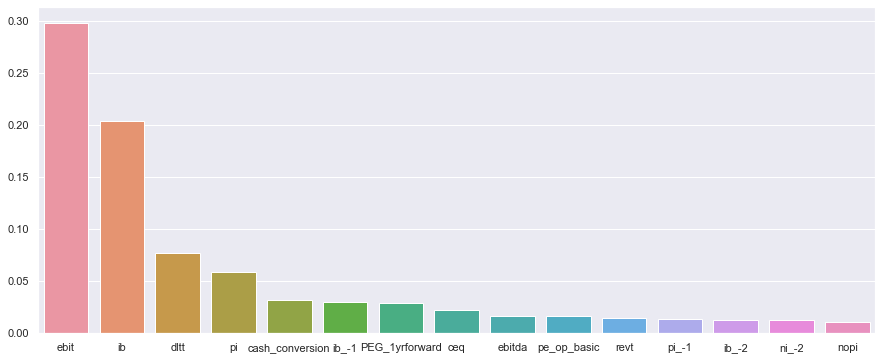

In [37]:
print(np.asarray(list(X_ts5.keys()))[(np.abs(rf5.feature_importances_[:]).argsort()[-15:][::-1])])
rf5.score(X_ts5, y_ts5)
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(X_ts5.keys()))[rf5.feature_importances_[:].argsort()[-15:][::-1]], 
                  y=(rf5.feature_importances_[:][rf5.feature_importances_[:].argsort()[-15:][::-1]]))

In [38]:
pct_er5 = (yhat_ts5- y_ts5)/y_ts5
pct_er5 = pct_er5.replace([np.inf, -np.inf], np.nan)
pct_er5 = pct_er5.dropna()
print(stats.ttest_1samp(pct_er5, 0))

Ttest_1sampResult(statistic=-0.02596266157956035, pvalue=0.9792873601531029)
